# Лабораторная работа №3

ФИО: Глушан Генрих Константинович   
Группа: БИВТ-21-3

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №7 в семестре (Занятие №3 очное)

Что необходимо сделать:  
- Обучить различного рода модели машинного обучения и сравнить их между собой  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`)
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, вам будет необходимо понять, умеет ли алгоритм работать с несколькими классами одновременно (обычно они не умеют). Поэтому вам может понадобиться такая штука, как OneVsRestClassifier ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)), но советую ознакомиться с этой [страницей](https://scikit-learn.org/stable/modules/multiclass.html), здесь представлена более полная информация.

## 1. Загрузить необходимые данные к себе и считать (read) их в переменную.

In [45]:
import pandas as pd

train_data = pd.read_csv('aug_train.csv')
train_data.drop(columns=['enrollee_id'], inplace=True)

print(train_data.info())
print(train_data.describe())
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB
None
       city_development_inde

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## 2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии

In [46]:
target_column = 'target'
unique_values = train_data[target_column].unique()
print(unique_values)

if len(unique_values) > 20 and train_data[target_column].dtype in ['int64', 'float64']:
    task_type = 'regression'
elif len(unique_values) == 2:
    task_type = 'binary classification'
else:
    task_type = 'multiclass classification'

print(f'Task type: {task_type}')

[1. 0.]
Task type: binary classification


## 3. Делаем предобработку данных

Данные изначально уже разделены на train и test.

In [47]:
missing_values = train_data.isnull().sum()
print(missing_values)

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [48]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
train_data[categorical_columns] = train_data[categorical_columns].fillna("Unknown")

print(train_data.isnull().sum())

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64


In [49]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['city_development_index', 'training_hours']

scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

print(train_data.head())

       city  city_development_index   gender      relevent_experience  \
0  city_103                0.738919     Male  Has relevent experience   
1   city_40               -0.428410     Male   No relevent experience   
2   city_21               -1.660590  Unknown   No relevent experience   
3  city_115               -0.323026  Unknown   No relevent experience   
4  city_162               -0.501368     Male  Has relevent experience   

  enrolled_university education_level major_discipline experience  \
0       no_enrollment        Graduate             STEM        >20   
1       no_enrollment        Graduate             STEM         15   
2    Full time course        Graduate             STEM          5   
3             Unknown        Graduate  Business Degree         <1   
4       no_enrollment         Masters             STEM        >20   

  company_size    company_type last_new_job  training_hours  target  
0      Unknown         Unknown            1       -0.488985     1.0  
1     

In [50]:
categorical_columns = train_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    freq_encoding = train_data[col].value_counts() / len(train_data)
    train_data[col] = train_data[col].map(freq_encoding)

print(train_data.head())

       city  city_development_index    gender  relevent_experience  \
0  0.227320                0.738919  0.690103             0.719908   
1  0.003549               -0.428410  0.690103             0.280092   
2  0.141038               -1.660590  0.235306             0.280092   
3  0.002819               -0.323026  0.235306             0.280092   
4  0.006681               -0.501368  0.690103             0.719908   

   enrolled_university  education_level  major_discipline  experience  \
0             0.721213         0.605387          0.756446    0.171521   
1             0.721213         0.605387          0.756446    0.035807   
2             0.196106         0.605387          0.756446    0.074642   
3             0.020148         0.605387          0.017069    0.027247   
4             0.721213         0.227633          0.756446    0.171521   

   company_size  company_type  last_new_job  training_hours  target  
0      0.309949      0.320493      0.419668       -0.488985     1.0  


##4. Обучить на тренировочном множестве:

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, accuracy_score, roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = train_data.drop(columns=['target'])
y = train_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##5. Посчитайте метрики на train и test множествах:

Model: Logistic Regression
Train Accuracy: 0.7718909043455565
Test Accuracy: 0.7703549060542797
Train ROC-AUC: 0.7810354882468304
Test ROC-AUC: 0.794107799369748
Train F1 Score: 0.39703345981372884
Test F1 Score: 0.40217391304347827
------------------------------
Model: Decision Tree
Train Accuracy: 0.7970116142502937
Test Accuracy: 0.7841858037578288
Train ROC-AUC: 0.8044242245488173
Test ROC-AUC: 0.7827503136671337
Train F1 Score: 0.5575309344332242
Test F1 Score: 0.5423353624792474
------------------------------
Model: K-Neighbors
Train Accuracy: 0.8296359128278742
Test Accuracy: 0.7640918580375783
Train ROC-AUC: 0.8808866179866145
Test ROC-AUC: 0.7343246673669468
Train F1 Score: 0.6185536888239591
Test F1 Score: 0.4786620530565167
------------------------------
Model: Random Forest
Train Accuracy: 0.9988907738483622
Test Accuracy: 0.7792275574112735
Train ROC-AUC: 0.9999929076925962
Test ROC-AUC: 0.7794489670868346
Train F1 Score: 0.9977769059761998
Test F1 Score: 0.513793103448275

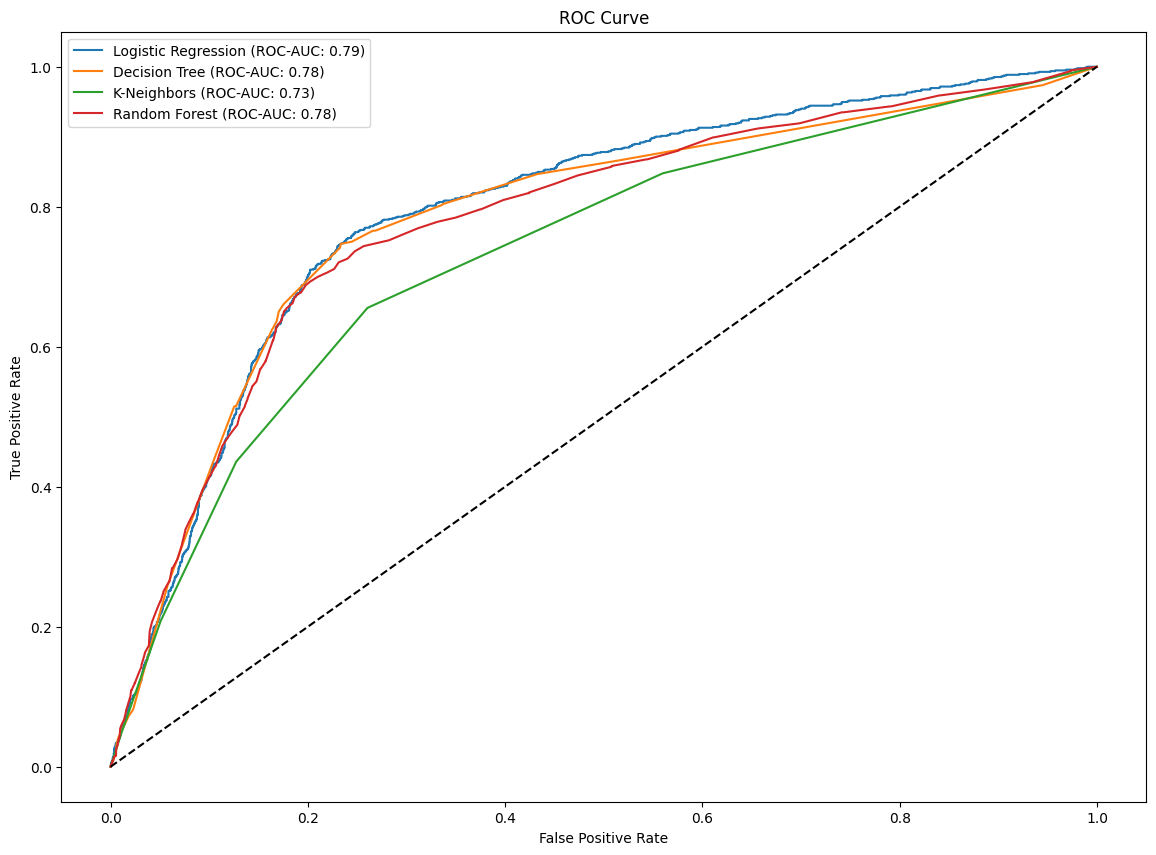

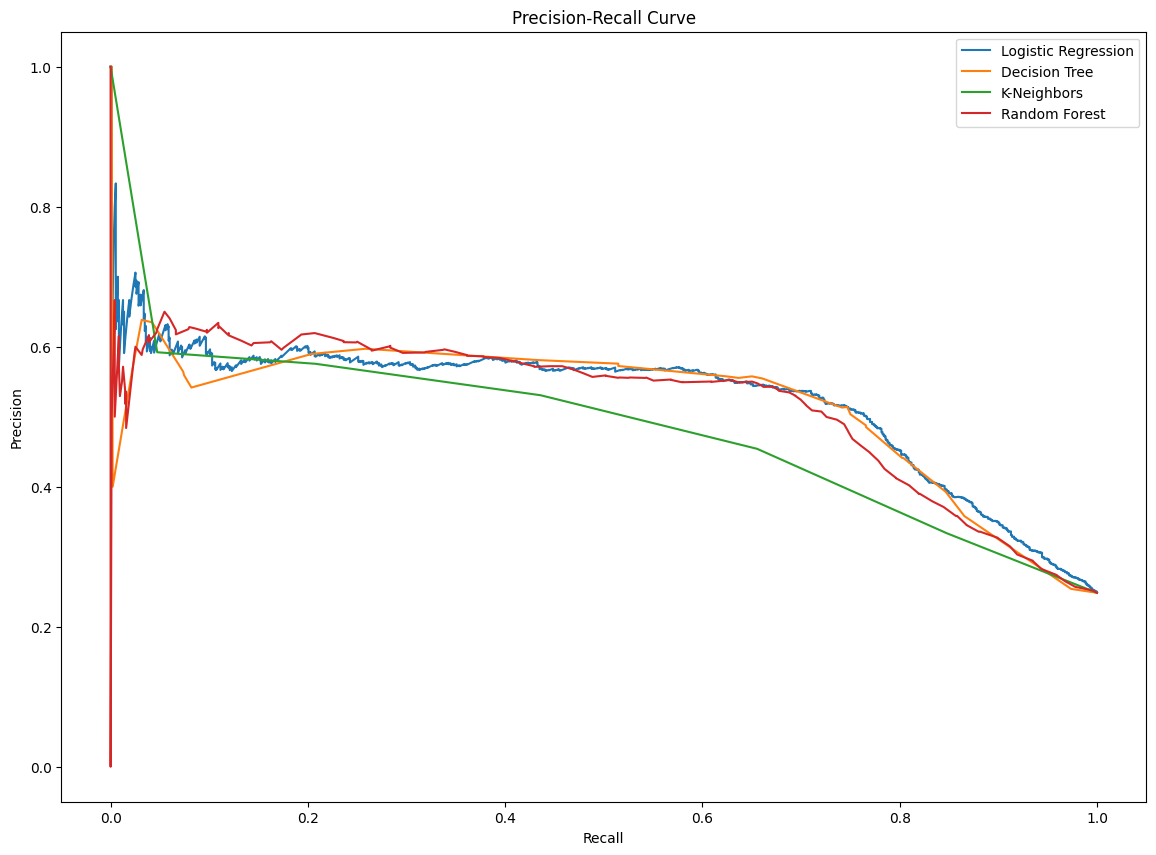

In [52]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": tree_clf,
    "K-Neighbors": knn_clf,
    "Random Forest": rf_clf
}

metrics = {}

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)

    metrics[name] = {
        "accuracy_train": accuracy_train,
        "accuracy_test": accuracy_test,
        "roc_auc_train": roc_auc_train,
        "roc_auc_test": roc_auc_test,
        "f1_train": f1_train,
        "f1_test": f1_test
    }

for model_name, metric in metrics.items():
    print(f"Model: {model_name}")
    print(f"Train Accuracy: {metric['accuracy_train']}")
    print(f"Test Accuracy: {metric['accuracy_test']}")
    print(f"Train ROC-AUC: {metric['roc_auc_train']}")
    print(f"Test ROC-AUC: {metric['roc_auc_test']}")
    print(f"Train F1 Score: {metric['f1_train']}")
    print(f"Test F1 Score: {metric['f1_test']}")
    print("-" * 30)

plt.figure(figsize=(14, 10))

for name, model in models.items():
    y_test_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f"{name} (ROC-AUC: {roc_auc_score(y_test, y_test_proba):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(14, 10))

for name, model in models.items():
    y_test_proba = model.predict_proba(X_test)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    plt.plot(recall, precision, label=f"{name}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

##6. Сравните метрики относительно train/test, так и относительно разных моделей.

In [53]:
print("Сравнение метрик:")
best_model = max(metrics, key=lambda x: metrics[x]['roc_auc_test'])
print(f"Лучше всех справилась модель: {best_model}\n")

for model_name, metric in metrics.items():
    print(f"Модель: {model_name}")
    print(f"Разница Accuracy (Train - Test): {metric['accuracy_train'] - metric['accuracy_test']:.4f}")
    print(f"Разница ROC-AUC (Train - Test): {metric['roc_auc_train'] - metric['roc_auc_test']:.4f}")
    print(f"Разница F1 Score (Train - Test): {metric['f1_train'] - metric['f1_test']:.4f}")

    if metric['accuracy_train'] > metric['accuracy_test']:
        print(f"В модели {model_name} наблюдается переобучение.")
    elif metric['accuracy_train'] < 0.7 and metric['accuracy_test'] < 0.7:
        print(f"В модели {model_name} наблюдается недообучение.")
    print("-" * 30)

Сравнение метрик:
Лучше всех справилась модель: Logistic Regression

Модель: Logistic Regression
Разница Accuracy (Train - Test): 0.0015
Разница ROC-AUC (Train - Test): -0.0131
Разница F1 Score (Train - Test): -0.0051
В модели Logistic Regression наблюдается переобучение.
------------------------------
Модель: Decision Tree
Разница Accuracy (Train - Test): 0.0128
Разница ROC-AUC (Train - Test): 0.0217
Разница F1 Score (Train - Test): 0.0152
В модели Decision Tree наблюдается переобучение.
------------------------------
Модель: K-Neighbors
Разница Accuracy (Train - Test): 0.0655
Разница ROC-AUC (Train - Test): 0.1466
Разница F1 Score (Train - Test): 0.1399
В модели K-Neighbors наблюдается переобучение.
------------------------------
Модель: Random Forest
Разница Accuracy (Train - Test): 0.2197
Разница ROC-AUC (Train - Test): 0.2205
Разница F1 Score (Train - Test): 0.4840
В модели Random Forest наблюдается переобучение.
------------------------------


Для улучшения метрик можно попробовать кросс-валидацию и регуляризацию